In [1]:
# import pandas as pd 

# path = 'raw/covidinfo/utla_2022-02-25.csv'
# df = pd.read_csv(path)
# df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(['areaCode', 'date']).reset_index(drop = True)
# df

# df['areaCode'].value_counts()

# ltla Covariates

In [1]:
import pandas as pd

path = 'data/ltla_neighbours_df.csv'
ltla_neighbours_df = pd.read_csv(path)# .rename(columns = {'LAD21NM': 'areaName',})
ltla_neighbours_df['neighboors'] = ltla_neighbours_df['neighboors'].apply(eval)
# ltla_neighbours_df

path = 'data/ltla_region_england.csv'
ltla_region_england_df = pd.read_csv(path).rename(columns = {'LAD21CD': 'areaCode',
                                                            'LAD21NM': 'areaName',})
path = 'data/ltal_covariates_df.csv'
ltla_covariates_df = pd.read_csv(path)
ltla_df = pd.merge(ltla_region_england_df, ltla_covariates_df)
# ltla_df = pd.merge(ltla_df, ltla_neighbours_df)
ltla_df['areaidx'] = list(range(1, len(ltla_df) + 1))

ltla_df.columns
ltla_df

,areaCode,areaName,NHSER21CD,NHSER21NM,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate,areaidx
0,E06000001,Hartlepool,E40000009,North East and Yorkshire,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,1
1,E06000002,Middlesbrough,E40000009,North East and Yorkshire,0.258597,0.315276,141285,36.3,2616,40.5,53.8816,37.015974,39.302367,0.505057,2
2,E06000003,Redcar and Cleveland,E40000009,North East and Yorkshire,0.378299,0.280907,137228,45.2,560,29.8,245.0698,42.037639,44.115800,0.514633,3
3,E06000004,Stockton-on-Tees,E40000009,North East and Yorkshire,0.299317,0.299981,197419,40.7,963,25.8,204.9331,39.646713,41.726862,0.505058,4
4,E06000005,Darlington,E40000009,North East and Yorkshire,0.333318,0.284279,107402,43.2,541,25.7,197.4758,41.155788,42.778638,0.513445,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,E09000029,Sutton,E40000003,London,0.238610,0.314247,207707,39.5,4706,14.0,43.8479,38.056436,39.842322,0.512202,301
301,E09000030,Tower Hamlets,E40000003,London,0.088241,0.257283,331969,31.6,16427,27.9,19.7710,32.614445,32.569271,0.474219,302
302,E09000031,Waltham Forest,E40000003,London,0.161879,0.307642,276940,35.2,7137,25.2,38.8102,35.037225,36.734122,0.495299,303
303,E09000032,Wandsworth,E40000003,London,0.133132,0.238689,329735,34.0,9624,16.6,34.2619,34.995129,35.965513,0.520603,304


# ltla covid info

In [2]:
import pandas as pd 

path = 'raw/covidinfo/ltla_2022-02-25.csv'
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['areaCode', 'date']).reset_index(drop = True)
ltla_covid_df = df[df['areaCode'].isin(ltla_df['areaCode'])].reset_index(drop = True)
ltla_covid_df['dateidx'] = ltla_covid_df['date'].apply(lambda x: (x-pd.to_datetime('2020-01-01')).days)
ltla_covid_df

,areaCode,areaName,areaType,date,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,newCasesBySpecimenDate,dateidx
0,E06000001,Hartlepool,ltla,2020-03-16,1,1.1,1.0,75
1,E06000001,Hartlepool,ltla,2020-03-17,1,1.1,0.0,76
2,E06000001,Hartlepool,ltla,2020-03-18,2,2.1,1.0,77
3,E06000001,Hartlepool,ltla,2020-03-19,2,2.1,0.0,78
4,E06000001,Hartlepool,ltla,2020-03-20,3,3.2,1.0,79
...,...,...,...,...,...,...,...,...
218886,E09000033,Westminster,ltla,2022-02-20,58626,21725.6,137.0,781
218887,E09000033,Westminster,ltla,2022-02-21,58767,21777.8,141.0,782
218888,E09000033,Westminster,ltla,2022-02-22,58913,21831.9,146.0,783
218889,E09000033,Westminster,ltla,2022-02-23,59035,21877.1,122.0,784


In [3]:
areaName_areaidx_df = ltla_df[['areaName', 'areaidx']]
areaName_areaidx_df

,areaName,areaidx
0,Hartlepool,1
1,Middlesbrough,2
2,Redcar and Cleveland,3
3,Stockton-on-Tees,4
4,Darlington,5
...,...,...
300,Sutton,301
301,Tower Hamlets,302
302,Waltham Forest,303
303,Wandsworth,304


# full data

In [4]:
full_data_df = pd.merge(ltla_covid_df, ltla_df[['areaCode', 'NHSER21NM',
       'old_dependency_ratio', 'young_dependency_ratio', 'popu_all',
       'Median age', 'People per sq. km', 'Average Score', 'Area (sq km)',
       'male_avg_age', 'female_avg_age', 'female_rate', 'areaidx']], on = 'areaCode')

full_data_df['newCasesRate'] = full_data_df['newCasesBySpecimenDate'] / full_data_df['popu_all'] * 10000

cols = [# areaidx
        'areaidx', 'areaCode', 'areaName', 'areaType', 'NHSER21NM',
        # date
        'dateidx', 'date', 
        # y
        'newCasesRate', 'cumCasesBySpecimenDate',
        'cumCasesBySpecimenDateRate', 'newCasesBySpecimenDate', 
        # features
        'old_dependency_ratio', 'young_dependency_ratio', 'popu_all',
       'Median age', 'People per sq. km', 'Average Score', 'Area (sq km)',
       'male_avg_age', 'female_avg_age', 'female_rate', 
       ]

full_data_df = full_data_df[cols]
full_data_df

,areaidx,areaCode,areaName,areaType,NHSER21NM,dateidx,date,newCasesRate,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,...,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,75,2020-03-16,0.106569,1,1.1,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,76,2020-03-17,0.000000,1,1.1,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,77,2020-03-18,0.106569,2,2.1,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,78,2020-03-19,0.000000,2,2.1,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,79,2020-03-20,0.106569,3,3.2,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218886,305,E09000033,Westminster,ltla,London,781,2022-02-20,5.076932,58626,21725.6,...,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
218887,305,E09000033,Westminster,ltla,London,782,2022-02-21,5.225164,58767,21777.8,...,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
218888,305,E09000033,Westminster,ltla,London,783,2022-02-22,5.410453,58913,21831.9,...,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
218889,305,E09000033,Westminster,ltla,London,784,2022-02-23,4.521064,59035,21877.1,...,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677


In [5]:
def convert_dateidx_to_date(dateidx):
    return (pd.to_timedelta(dateidx, unit = 'D') + pd.to_datetime('2020-01-01')).date()

# dateidx = 10
# convert_dateidx_to_date(dateidx)


def convert_date_to_dateidx(date):
    return (pd.to_datetime(date) - pd.to_datetime('2020-01-01')).days


# date = '2021-5-1'
# convert_date_to_dateidx(date)


In [6]:
# areaName_areaidx_df#.query(f"~({unit_col}=={treat_idx})")

In [7]:
# areaName_areaidx_df.query(f'~(areaName==Liverpool)')

In [8]:
def convert_areaName_to_areaidx(areaName):
    df = areaName_areaidx_df
    return df[df['areaName'] == areaName].iloc[0]['areaidx']
    
# areaName = 'Liverpool'
# areaidx = convert_areaName_to_areaidx(areaName)
# print(areaidx)

def convert_areaidx_to_areaName(areaidx):
    df = areaName_areaidx_df
    return df[df['areaidx'] == areaidx].iloc[0]['areaName']

# areaidx = 249
# areaName = convert_areaidx_to_areaName(areaidx)
# print(areaName)

# Game Info

In [10]:
ltla_game_df = pd.read_csv('data/ltla_game_df.csv')
ltla_game_df['date'] = pd.to_datetime(ltla_game_df['date'])

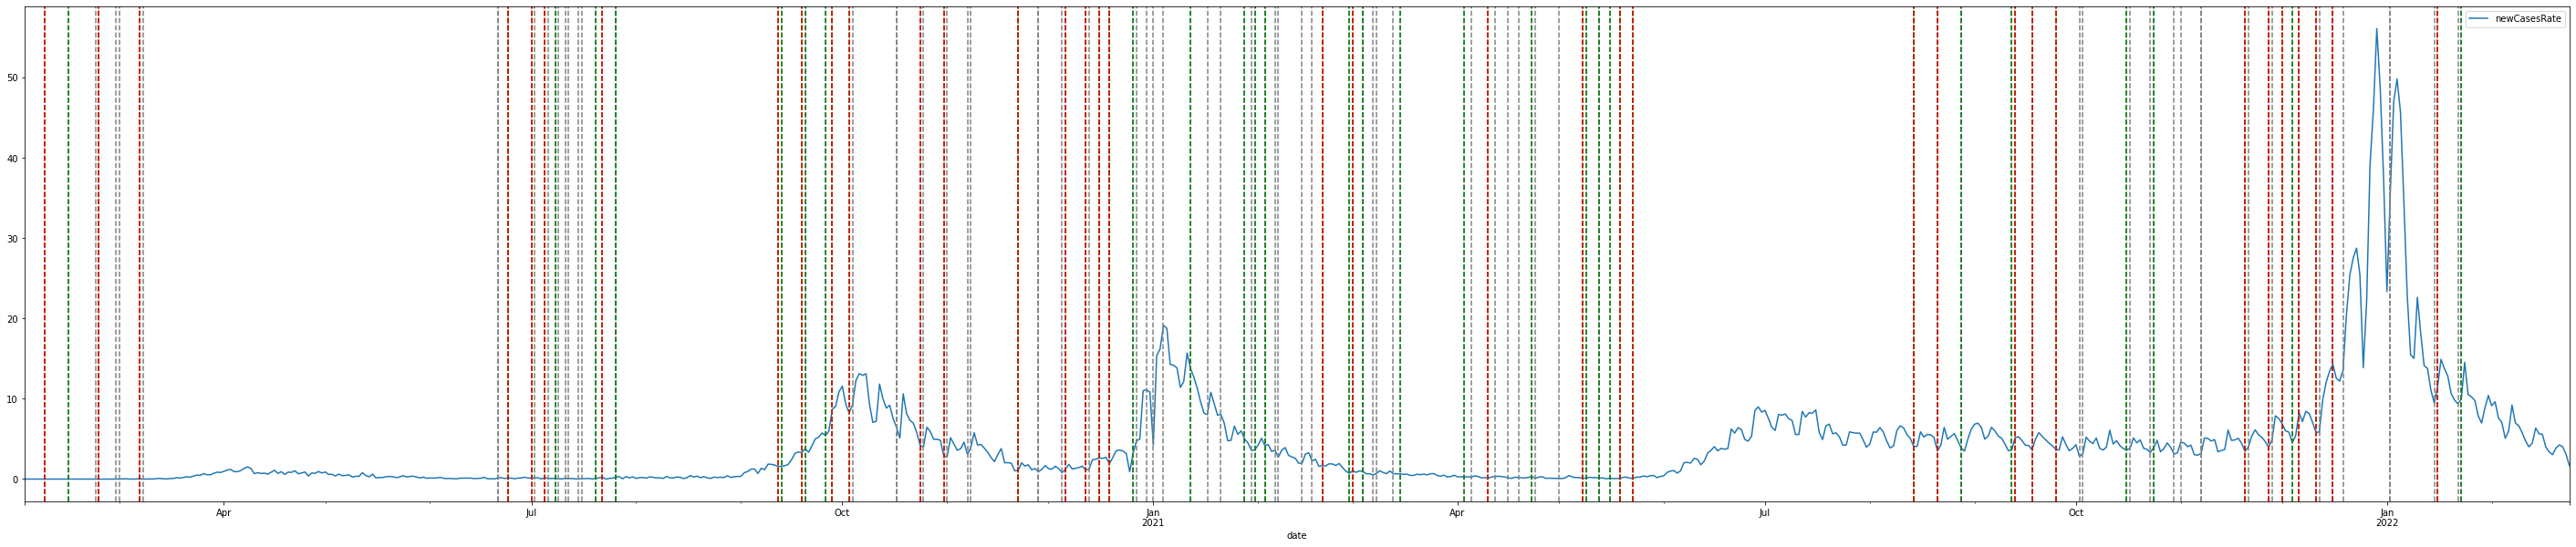

In [13]:
import matplotlib.pyplot as plt

def plot_covid_soccer(city_covid_df, city_game_df, y_col):
    fig, ax = plt.subplots(figsize=(50, 10))
    df = city_covid_df# [start:end]
    df[[# 'cumCasesBySpecimenDate',
        # 'cumCasesBySpecimenDateRate', 
        y_col,
       ]].plot(ax = ax)
    xposition = city_game_df['date']
    for xc in xposition:
        ax.axvline(x=xc, color='grey', linestyle='--')
    xposition = city_game_df[city_game_df['win'] == 1]['date']
    for xc in xposition:
        ax.axvline(x = xc, color='green', linestyle='--')
    xposition = city_game_df[city_game_df['host'] == 1]
    xposition = xposition[xposition['win'] == 1]['date']
    for xc in xposition:
        ax.axvline(x = xc, color='red', linestyle='--')
        
        

city_name = 'Liverpool'
y_col = 'newCasesRate' # 10k
city_covid_df = full_data_df[full_data_df['areaName'] == city_name].reset_index(drop = True)
city_covid_df = city_covid_df.set_index('date')
city_game_df = ltla_game_df[ltla_game_df['city'] == city_name].reset_index(drop = True)
plot_covid_soccer(city_covid_df, city_game_df, y_col)

In [14]:
required_gap = 7 # days

gaps = pd.to_timedelta(required_gap, unit = 'D')

for idx, row in city_game_df.iterrows():
    if idx <= 1 or idx == len(city_game_df) - 1: continue
    date = row['date']
    last_game = city_game_df.loc[idx - 1]['date']
    next_game = city_game_df.loc[idx + 1]['date']
    # if date - gaps > last_game and date + gaps < next_game:
    if date - gaps > last_game:
    # if date + gaps < next_game:
        print(date.date(), '----', last_game.date(), next_game.date())

2020-09-28 ---- 2019-08-24 2021-11-20
2021-11-20 ---- 2020-09-28 2019-09-14
2021-04-24 ---- 2019-09-14 2021-12-16
2021-12-16 ---- 2021-04-24 2019-10-05
2020-11-22 ---- 2019-10-05 2019-10-27
2020-12-16 ---- 2019-10-27 2019-11-10
2021-02-07 ---- 2019-11-10 2021-10-03
2021-10-03 ---- 2021-02-07 2019-11-30
2021-02-03 ---- 2019-11-30 2021-10-30
2021-10-30 ---- 2021-02-03 2019-12-04
2021-02-20 ---- 2019-12-04 2021-02-20
2019-12-29 ---- 2019-12-14 2020-12-06
2020-12-06 ---- 2019-12-29 2020-01-02
2020-10-24 ---- 2020-01-02 2020-01-19
2021-01-17 ---- 2020-01-19 2020-02-01
2021-05-08 ---- 2020-02-01 2021-11-27
2021-11-27 ---- 2021-05-08 2020-02-24
2020-10-31 ---- 2020-02-24 2020-03-07
2020-06-24 ---- 2020-03-07 2021-05-23
2021-05-23 ---- 2020-06-24 2021-09-18
2021-09-18 ---- 2021-05-23 2020-07-05
2021-04-10 ---- 2020-07-05 2021-12-11
2021-12-11 ---- 2021-04-10 2020-07-11
2021-01-21 ---- 2020-07-11 2021-08-21
2021-08-21 ---- 2021-01-21 2020-07-22
2021-03-04 ---- 2020-07-22 2021-08-28
2021-08-28 -

# City - Date

In [15]:
treat_areaName ="Liverpool" #  'Leeds' # "Liverpool"
treat_date = '2020-09-12' # '2020-06-26' # '2020-11-07' #'2020-06-26'
gap = 7

# argument: 
features = [] 

########################


treat_areaidx = convert_areaName_to_areaidx(treat_areaName)
treat_dateidx = convert_date_to_dateidx(treat_date)
print('areaidx: {}, dateidx: {}'.format(treat_areaidx, treat_dateidx))
print('gap is {}'.format(gap))

areaidx: 249, dateidx: 255
gap is 7


In [16]:

# filter out the unwanted cities
game_ltla_list = [i for i in ltla_game_df['city'].unique() if i != treat_areaName]
neighours = ltla_neighbours_df[ltla_neighbours_df['LAD21NM'] == treat_areaName]['neighboors'].values[0]

data = full_data_df[- full_data_df['areaName'].isin(game_ltla_list + neighours)].reset_index(drop = True)
# filter out the unwanted dates
data = data[data['dateidx'].apply(lambda x: abs(x - treat_dateidx) <= gap)].reset_index(drop = True)


# Donor Pool. 
data['post_treatment'] = (data['dateidx'] >= treat_dateidx)
data['treat_unit'] = (data['areaidx'] == treat_areaidx)
data


,areaidx,areaCode,areaName,areaType,NHSER21NM,dateidx,date,newCasesRate,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,...,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate,post_treatment,treat_unit
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,248,2020-09-05,0.319707,705,751.3,...,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,False,False
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,249,2020-09-06,0.426276,709,755.6,...,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,False,False
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,250,2020-09-07,1.172258,720,767.3,...,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,False,False
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,251,2020-09-08,1.065689,730,778.0,...,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,False,False
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,252,2020-09-09,0.745982,737,785.4,...,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,305,E09000033,Westminster,ltla,London,258,2020-09-15,0.444695,1073,397.6,...,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,True,False
4166,305,E09000033,Westminster,ltla,London,259,2020-09-16,0.370579,1083,401.3,...,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,True,False
4167,305,E09000033,Westminster,ltla,London,260,2020-09-17,0.259405,1090,403.9,...,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,True,False
4168,305,E09000033,Westminster,ltla,London,261,2020-09-18,0.518811,1104,409.1,...,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,True,False


In [17]:
data[data['areaidx'] == treat_areaidx]

,areaidx,areaCode,areaName,areaType,NHSER21NM,dateidx,date,newCasesRate,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,...,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate,post_treatment,treat_unit
3510,249,E08000012,Liverpool,ltla,North West,248,2020-09-05,1.258807,3160,631.4,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,False,True
3511,249,E08000012,Liverpool,ltla,North West,249,2020-09-06,0.699337,3195,638.4,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,False,True
3512,249,E08000012,Liverpool,ltla,North West,250,2020-09-07,1.338731,3262,651.8,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,False,True
3513,249,E08000012,Liverpool,ltla,North West,251,2020-09-08,1.178882,3321,663.6,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,False,True
3514,249,E08000012,Liverpool,ltla,North West,252,2020-09-09,1.858238,3414,682.2,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,False,True
3515,249,E08000012,Liverpool,ltla,North West,253,2020-09-10,1.838257,3506,700.5,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,False,True
3516,249,E08000012,Liverpool,ltla,North West,254,2020-09-11,1.738352,3593,717.9,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,False,True
3517,249,E08000012,Liverpool,ltla,North West,255,2020-09-12,1.558523,3671,733.5,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,True,True
3518,249,E08000012,Liverpool,ltla,North West,256,2020-09-13,1.598485,3751,749.5,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,True,True
3519,249,E08000012,Liverpool,ltla,North West,257,2020-09-14,1.658428,3834,766.1,...,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,True,True


# Plot

In [18]:
import numpy as np


time_col = 'date'
treat_col = 'treat_unit'
y_col = 'newCasesRate'

df = (data
 .assign(groups = np.where(data[treat_col], treat_areaName, "Other Cities"))
 .groupby([time_col, "groups"])[y_col]
 .mean()
 .reset_index()
 .pivot(time_col, 'groups', y_col)
)

df

groups,Liverpool,Other Cities
date,,
2020-09-05,1.258807,0.282078
2020-09-06,0.699337,0.280492
2020-09-07,1.338731,0.493527
2020-09-08,1.178882,0.448162
2020-09-09,1.858238,0.396686
2020-09-10,1.838257,0.419399
2020-09-11,1.738352,0.375430
2020-09-12,1.558523,0.282299
2020-09-13,1.598485,0.234695


In [19]:
# date

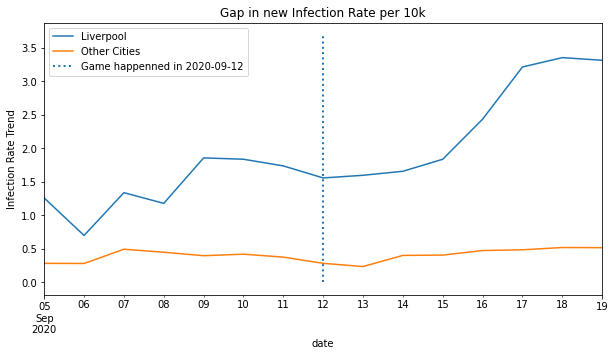

In [20]:
ax = plt.subplot(1, 1, 1)
df.plot(ax=ax, figsize=(10,5))
plt.vlines(x= pd.to_datetime(treat_date), 
           ymin=0, 
           ymax=1.1 * max(df.max()), linestyle=":", lw=2, label="Game happenned in {}".format(treat_date))
plt.ylabel("Infection Rate Trend")
plt.title("Gap in new Infection Rate per 10k")
plt.legend()

# Matching Features

In [21]:
from typing import List
from operator import add
from toolz import reduce, partial
from scipy.optimize import fmin_slsqp

def loss_w(W, X, y) -> float:
    return np.sqrt(np.mean((y - X.dot(W))**2))

def get_w(X, y):
    
    w_start = [1/X.shape[1]]*X.shape[1] # initialized weights

    weights = fmin_slsqp(partial(loss_w, X = X, y = y),
                         np.array(w_start),
                         f_eqcons = lambda x: np.sum(x) - 1,
                         bounds=[(0.0, 1.0)]*len(w_start),
                         disp=False)
    return weights


# only the pre-period

features = [y_col, 'People per sq. km',
            'old_dependency_ratio', 'young_dependency_ratio', 'Average Score', 'male_avg_age', 
           'female_avg_age', 'female_rate']

inverted = (data.query(f"~post_treatment") # filter pre-intervention period
            .pivot(index = 'areaidx' , columns= 'dateidx')[features] # make one column per year and one row per state
            .T.drop_duplicates()) # flip the table to have one column per state

inverted#.head()



areaidx                                1            2           3    \
                       dateidx                                        
newCasesRate           248        0.319707     0.778568    0.582971   
                       249        0.426276     0.778568    0.510100   
                       250        1.172258     0.637010    0.437229   
                       251        1.065689     1.274021    0.291486   
                       252        0.745982     0.566231    0.510100   
                       253        1.278827     0.353895    0.145743   
                       254        0.532845     0.353895    0.145743   
People per sq. km      248      999.000000  2616.000000  560.000000   
old_dependency_ratio   248        0.313702     0.258597    0.378299   
young_dependency_ratio 248        0.288634     0.315276    0.280907   
Average Score          248       35.000000    40.500000   29.800000   
male_avg_age           248       40.157418    37.015974   42.037639   
female_avg_age         248       42.190274    39.302367   44.115800   
female_rate            248        0.509730     0.505057    0.514633   

areaidx                                4           5            7    \
                       dateidx                                        
newCasesRate           248        0.253268    0.465541     1.146148   
                       249        0.253268    0.093108     1.480441   
                       250        0.557191    0.558649     1.910247   
                       251        0.557191    0.372433     1.910247   
                       252        0.810459    0.651757     1.766979   
                       253        0.557191    0.372433     1.480441   
                       254        0.354576    0.093108     2.005759   
People per sq. km      248      963.000000  541.000000  1163.000000   
old_dependency_ratio   248        0.299317    0.333318     0.302608   
young_dependency_ratio 248        0.299981    0.284279     0.279466   
Average Score          248       25.800000   25.700000    18.900000   
male_avg_age           248       39.646713   41.155788    40.452154   
female_avg_age         248       41.726862   42.778638    42.309614   
female_rate            248        0.505058    0.513445     0.504086   

areaidx                                 8            9            10   \
                       dateidx                                          
newCasesRate           248         0.933147     0.289057     0.038591   
                       249         1.199760     0.578114     0.270139   
                       250         2.132907     0.289057     0.540278   
                       251         3.399320     0.289057     0.115774   
                       252         2.199560     0.361321     0.115774   
                       253         1.732987     0.361321     0.038591   
                       254         1.732987     1.373021     0.077183   
People per sq. km      248      1092.000000  3999.000000  3629.000000   
old_dependency_ratio   248         0.229883     0.332554     0.231794   
young_dependency_ratio 248         0.338812     0.285957     0.291240   
Average Score          248        36.000000    45.000000    40.600000   
male_avg_age           248        36.626540    41.063122    37.117334   
female_avg_age         248        37.817297    42.667796    38.678151   
female_rate            248         0.498414     0.503256     0.496419   

areaidx                                11   ...          295          296  \
                       dateidx              ...                             
newCasesRate           248        0.116550  ...     0.098261     0.242186   
                       249        0.000000  ...     0.131015     0.193749   
                       250        0.407924  ...     0.327537     0.193749   
                       251        0.262237  ...     0.458552     0.290623   
                       252        0.611886  ...     0.294783     0.193749   
                  

In [46]:
y = inverted[treat_areaidx]# .values
y
#print(y.shape)
# inverted[areaidx]

                        dateidx
newCasesRate            248           1.258807
                        249           0.699337
                        250           1.338731
                        251           1.178882
                        252           1.858238
                        253           1.838257
                        254           1.738352
People per sq. km       248        4453.000000
old_dependency_ratio    248           0.214742
young_dependency_ratio  248           0.241551
Average Score           248          42.400000
male_avg_age            248          36.823739
female_avg_age          248          38.438335
female_rate             248           0.499682
Name: 249, dtype: float64

In [44]:
X = inverted.drop(columns=treat_areaidx)#.values  # other states
# inverted.drop(columns=areaidx)
X.columns

Int64Index([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,
            ...
            295, 296, 298, 299, 300, 301, 302, 303, 304, 305],
           dtype='int64', name='areaidx', length=277)

# Get Weights

In [47]:
weights = get_w(X.values, y.values)

print(len(weights))
weights = np.round(weights, 4)
print("Sum:", weights.sum())
weights

277
Sum: 0.9999999999999999


array([0.    , 0.4482, 0.    , 0.    , 0.    , 0.    , 0.0909, 0.3365,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
      

In [80]:
areidx2weight = {X.columns[idx]: weights[idx] for idx, weight in enumerate(weights) if weight > 0}
print(areidx2weight)
matched_idx = [i for i in areidx2weight]
print(matched_idx)
neat_weights = [areidx2weight[i] for i in matched_idx]
print(neat_weights)

{2: 0.4482, 8: 0.0909, 9: 0.3365, 284: 0.1244}
[2, 8, 9, 284]
[0.4482, 0.0909, 0.3365, 0.1244]


In [81]:
df_y = data.query("~treat_unit").pivot(index='date', columns="areaidx")[y_col]#[[i for i in areidx2weight]]
area_synth = df_y[matched_idx].values.dot(np.array([areidx2weight[i] for i in matched_idx]))
df_y = data.pivot(index='date', columns="areaidx")[y_col]#[[i for i in areidx2weight]]
synth_df = df_y[ matched_idx].reset_index(drop = True)
synth_df['synth'] = area_synth
synth_df

areaidx,2,8,9,284,synth
0,0.778568,0.933147,0.289057,0.308347,0.569403
1,0.778568,1.199760,0.578114,0.068522,0.661072
2,0.637010,2.132907,0.289057,0.308347,0.615015
3,1.274021,3.399320,0.289057,0.685215,1.062523
4,0.566231,2.199560,0.361321,0.479651,0.634978
5,0.353895,1.732987,0.361321,0.513912,0.501659
6,0.353895,1.732987,1.373021,0.342608,0.820786
7,0.283116,1.133107,0.144529,0.274086,0.312622
8,0.283116,1.066453,0.578114,0.137043,0.435417
9,0.637010,1.932947,0.867171,0.479651,0.812685


In [82]:
df = data.reset_index(drop = True)
# df['synth_y'] = area_synth
df = df[['date', y_col, 'post_treatment']]
df = data.query("treat_unit").reset_index(drop = True)
# df['synth_y'] = area_synth
df = pd.concat([df[['date', 'post_treatment', y_col]], synth_df], axis = 1)
df

,date,post_treatment,newCasesRate,2,8,9,284,synth
0,2020-09-05,False,1.258807,0.778568,0.933147,0.289057,0.308347,0.569403
1,2020-09-06,False,0.699337,0.778568,1.199760,0.578114,0.068522,0.661072
2,2020-09-07,False,1.338731,0.637010,2.132907,0.289057,0.308347,0.615015
3,2020-09-08,False,1.178882,1.274021,3.399320,0.289057,0.685215,1.062523
4,2020-09-09,False,1.858238,0.566231,2.199560,0.361321,0.479651,0.634978
5,2020-09-10,False,1.838257,0.353895,1.732987,0.361321,0.513912,0.501659
6,2020-09-11,False,1.738352,0.353895,1.732987,1.373021,0.342608,0.820786
7,2020-09-12,True,1.558523,0.283116,1.133107,0.144529,0.274086,0.312622
8,2020-09-13,True,1.598485,0.283116,1.066453,0.578114,0.137043,0.435417
9,2020-09-14,True,1.658428,0.637010,1.932947,0.867171,0.479651,0.812685


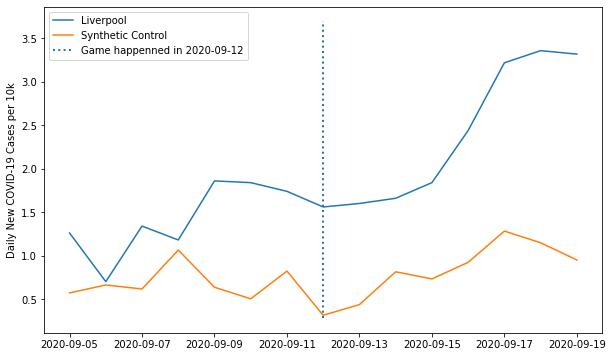

In [87]:
plt.figure(figsize=(10,6))

time_idx = df['date']
plt.plot(time_idx, df[y_col], label=treat_areaName)
plt.plot(time_idx, df['synth'], label="Synthetic Control")
# for i in df[matched_idx]:
#     plt.plot(time_idx, df[i], label='Control City {}'.format(i))
    
# plt.vlines(x = date, ymin=0, ymax = max(area_synth), linestyle=":", lw=2, label=str(date))
plt.vlines(x = pd.to_datetime(treat_date), 
           ymin=0.9 * min(df[[y_col, 'synth']].min()), 
           ymax=1.1 * max(df[[y_col, 'synth']].max()), 
           linestyle=":", lw=2, label="Game happenned in {}".format(treat_date))

plt.ylabel("Daily New COVID-19 Cases per 10k")
plt.legend()

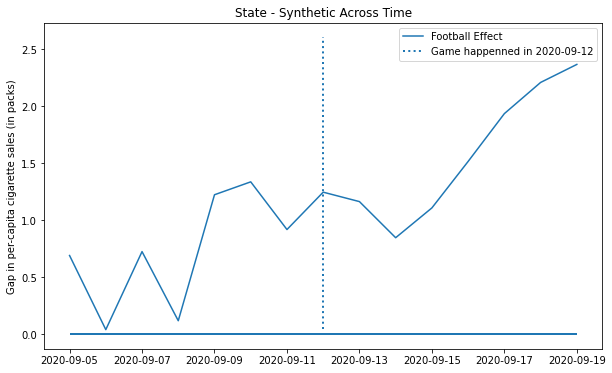

In [88]:
plt.figure(figsize=(10,6))

time_idx = pd.to_datetime(data.query("treat_unit")["date"])

diff = df[y_col] - area_synth
plt.plot(time_idx, 
         diff,
         label="Football Effect")

plt.vlines(x = pd.to_datetime(treat_date), 
           ymin=1.1 * min((diff)), ymax= 1.1* max(abs(diff)), 
           linestyle=":", lw=2, label="Game happenned in {}".format(treat_date))

plt.hlines(y=0, lw=2, xmin = min(time_idx), xmax = max(time_idx))
plt.title("State - Synthetic Across Time")
plt.ylabel("Gap in per-capita cigarette sales (in packs)")
plt.legend()


In [90]:
df['effect'] = df[y_col] - df['synth']

df.groupby('post_treatment')[[y_col, 'synth', 'effect']].mean()

,newCasesRate,synth,effect
post_treatment,,,
False,1.415801,0.695062,0.720738
True,2.372751,0.823661,1.549090


# ---- Parking Lot 

In [37]:

# import matplotlib.pyplot as plt



# required_gap = 7 # days


# city_covid_df = ltla_covid_df[ltla_covid_df['areaName'] == city_name].reset_index(drop = True)
# city_covid_df = city_covid_df.set_index('date')

# fig, ax = plt.subplots(figsize=(15, 8))

# game_date = pd.to_datetime(date)
# gaps = pd.to_timedelta(required_gap, unit = 'D')
# start = game_date - gaps
# end = game_date + gaps


# df = city_covid_df[start:end]
# df[['cumCasesBySpecimenDate',
#     # 'cumCasesBySpecimenDateRate', 
#     # 'newCasesBySpecimenDate'
#    ]].plot(ax = ax)


# xposition = [game_date]
# for xc in xposition:
#     ax.axvline(x=xc, color='grey', linestyle='--')
    

In [38]:
# game_date = pd.to_datetime(date)
# gaps = pd.to_timedelta(required_gap, unit = 'D')
# start = game_date - gaps
# end = game_date + gaps


# def filter_time(date, start, end):
#     return date > start and date < end


# game_ltla_list = [i for i in ltla_game_df['team_LAD21NM'].unique() if i != ltla]
# neighours = ltla_neighbours_df[ltla_neighbours_df['LAD21NM'] == ltla]['neighboors'].values[0]
# print(game_ltla_list)
# print(neighours)


# df = ltla_covid_df[- ltla_covid_df['areaName'].isin(game_ltla_list + neighours)]
# df = df[df['date'].apply(lambda x: filter_time(x, start, end))]
# # df = df.rename(columns = {'cumCasesBySpecimenDate': 'cumcase'})
# df

In [39]:
# df = df.reset_index(drop = True)
# df['dateidx'] = df['date'].apply(lambda x: (x - game_date).days + required_gap)
# df

In [40]:
# final_df = pd.merge(df[['areaName', 'dateidx',  'date', 'cumcase', 'cumCasesBySpecimenDateRate', 'newCasesBySpecimenDate', ]], ltla_df, on = 'areaName')

# final_df = final_df.sort_values(['areaidx', 'dateidx']).reset_index(drop = True)
# final_df.to_csv('data/{}_{}.csv'.format(ltla, str(game_date.date())), index = False)
# final_df

In [91]:
# for areaName, ltla_df in df.groupby('areaName'):
#     ltla_df

In [92]:
# ltla_df['dateidx'] = list(range(len(ltla_df)))
# ltla_df = ltla_df.rename(columns = {'cumCasesBySpecimenDate': 'cumcase'}).reset_index(drop = True)
# ltla_df

In [93]:
# ltla_df.pivot_table(values = 'cumcase', index = 'areaName', columns = 'dateidx').reset_index()

In [41]:
# df['dateidx'] = df['date'].apply(lambda x: (x - game_date).days )
# df

In [42]:
# ltla_covid_flatten_df = df.pivot_table(values = 'cumcase', index = 'areaName', columns = 'dateidx').reset_index()
# ltla_covid_flatten_df

In [43]:
# final_df = pd.merge(ltla_covid_flatten_df, ltla_df, on = 'areaName')
# final_df

In [44]:
# final_df.columns